In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
tf.test.is_built_with_gpu_support()

True

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#%tensorflow_version 2.x
#import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
    raise SystemError('GPU device not found')

def cpu():
    with tf.device('/cpu:0'):
        random_image_cpu = tf.random.normal((100, 100, 100, 3))
        net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
        return tf.math.reduce_sum(net_cpu)

def gpu():
    with tf.device('/device:GPU:0'):
        random_image_gpu = tf.random.normal((100, 100, 100, 3))
        net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
        return tf.math.reduce_sum(net_gpu)

cpu()
gpu()

# Ejecuta la operación varias veces.
print('Tiempo (s) para convertir el filtro 32x7x7x3 en imágenes aleatorias de 100x100x100x3 '
      '(batch x height x width x channel). Suma de diez corridas.')

print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

print('Aceleración de GPU sobre CPU: {}x'.format(int(cpu_time/gpu_time)))

Tiempo (s) para convertir el filtro 32x7x7x3 en imágenes aleatorias de 100x100x100x3 (batch x height x width x channel). Suma de diez corridas.
CPU (s):
2.8730333099999825
GPU (s):
0.038730995999969764
Aceleración de GPU sobre CPU: 74x


In [ ]:
!nvidia-smi

Sat Aug 13 14:11:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    31W /  70W |   1858MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Opción 1 - Añadir capas a partir de una lista

model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [ ]:
# Opción 2 - Añadir capas con el método .add()

model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

### AND

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[0],[0],[1]])
y

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
model = Sequential()
model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6976
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6971
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6966
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6961
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6956
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6951
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6947
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6942
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6937
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6928
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6923
Epoch 13/1000
1/1 [========================

In [ ]:
loss = history.history["loss"]

In [ ]:
# loss

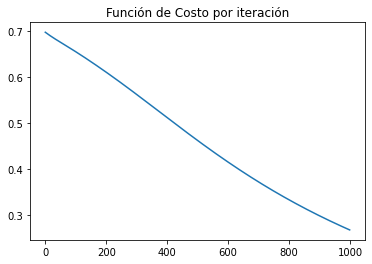

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

array([[0.05973358],
       [0.27421936],
       [0.28749418],
       [0.7058606 ]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
y

array([[0],
       [0],
       [0],
       [1]])

### OR

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[1],[1],[1]])
y

array([[0],
       [1],
       [1],
       [1]])

In [ ]:
model = Sequential()
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 416ms/step - loss: 0.6516
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6509
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6502
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6496
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6489
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6482
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6475
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6468
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6461
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6455
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6448
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6441
Epoch 13/1000
1/1 [==========================

In [ ]:
loss = history.history["loss"]

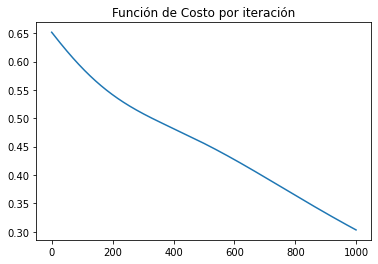

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

array([[0.46465325],
       [0.7471894 ],
       [0.8400817 ],
       [0.8862527 ]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

array([[0],
       [1],
       [1],
       [1]])

In [ ]:
y

array([[0],
       [1],
       [1],
       [1]])

### XOR

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[1],[1],[0]])
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
model = Sequential()
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 541ms/step - loss: 0.7010
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7008
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7007
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7006
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7004
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7003
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7002
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.7000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6999
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6998
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6996
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6995
Epoch 13/2000
1/1 [=======================

In [ ]:
loss = history.history["loss"]

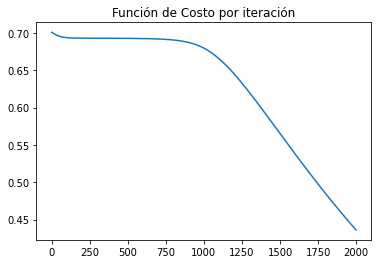

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

array([[0.35086286],
       [0.61786807],
       [0.660171  ],
       [0.33973426]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])